In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Theory

For a vibrating 2D plate, let the height at some point on the plate during vibration be $u(x,y,t)$. The differential equation governing the motion is given by

$$u_{tt} = c^2\nabla^2 u$$

 where $c$ is the wave speed. The *eigenmodes* of vibration occur when the plate is vibrated at very specific frequencies:

$$f(n,m) = \frac{c}{2\pi} \sqrt{\frac{n^2}{L_x^2} + \frac{m^2}{L_y^2}}$$

where $L_x$ and $L_y$ are the dimensions of the rectangular plate and $n$ and $m$ are integers. In particular, if one knows $c$, $L_x$, and $L_y$, one can plug in different integer values of $n$ and $m$ to determine precisely what these special frequencies are.

 At these special frequencies, we have that $u(x,y,t) = U(x,y)G(t)$ (the solution in space and time is seperable) where $G(t)$ is a periodic oscillating function. If the plate is suspended in the center, then the boundary conditions are such that maximum amplitude occurs at the boundary of the plates, and 

$$U(x,y) \propto |\sin(n \pi x/L_x)\sin(m \pi y/L_y) - \sin(m \pi x/L_x)\sin(n \pi y/L_y)|$$

where $n$ and $m$ are **odd** integers corresponding to a particular driving frequency that gives a particular mode of vibration.



# Code

Lets create the coordinates of the rectangular grid

In [2]:
x = y = np.linspace(-1, 1, 1000)
xv, yv = np.meshgrid(x,y)

Define a function the represents the amplitude $U(x,y)$\
Where $L_x=2$ and $L_y=2$ (Dimensionless)

In [3]:
def amplitude(xv, yv, n, m):
    return np.abs(np.sin(n*np.pi*xv/2)*np.sin(m*np.pi*yv/2)-np.sin(m*np.pi*xv/2)*np.sin(n*np.pi*yv/2))
# np.abs --> To avoid negative values consider 

Plot some sample $U(x,y)$ for different values of $n$ and $m$\
For centre suspension consider odd $n$ and $m$

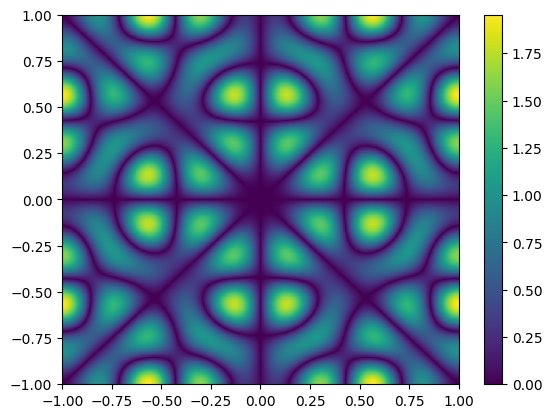

In [4]:
plt.pcolormesh(xv, yv, amplitude(xv, yv, 5, 9))
plt.colorbar()

We can create the coordinates of grains of sand as follows:

In [5]:
p = np.random.uniform(-1, 1, size=(2,1000))

In [6]:
p

array([[-0.63654243, -0.92582242, -0.78868357, ..., -0.68152091,
         0.02812845, -0.55890162],
       [ 0.96476463, -0.21377103, -0.39793353, ...,  0.68534412,
        -0.71495519,  0.85046374]])

We can then plot them on the grid:

In [7]:
p.shape

(2, 1000)

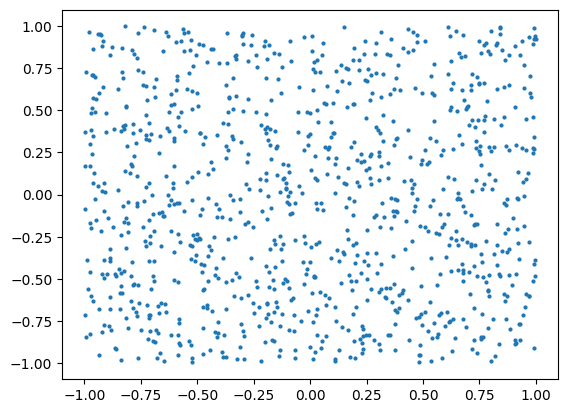

In [8]:
plt.plot(*p, "o",  ms=2) # * takes the first argument and separates it into bunch of different argunments, here x and y are first arg of p


This `Sand` class will include
1. The number of points `N_points`
2. The locations of the points `points`
3. The distance `delta` a grain of sand moves when at a position of maximum vibrating amplitude
4. A function `move`, which will move all the sand grains at once. Each grain moves in random direction specified by `angle`

In addition, the previous locations of the points `prev_points` will be tracked so that smooth animations can be produced later (can plot intermediate locations through interpolation)

In [9]:
class Sand:
    def __init__(self, N_particles, amplitude, delta):
        self.N_particles = N_particles
        self.cordt = np.random.uniform(-1, 1, size=(2,self.N_particles))
        self.amplitude = amplitude
        self.delta = delta
        
    def move(self, **amplitude_params):
        angles = np.random.uniform(0, 2*np.pi, size=self.N_particles)
        dr = self.delta * np.array([np.cos(angles), np.sin(angles)]) \
              * self.amplitude(*self.cordt, **amplitude_params) / 2
        self.prev_cordt = np.copy(self.cordt)
        self.cordt += dr

Lets create an ensemble of grains of sand.

In [10]:
ensemble = Sand(1000, amplitude, delta=0.5)

We can move the sand points, and then plot

In [11]:
ensemble.move(n=3, m=5)

(-1.0, 1.0)

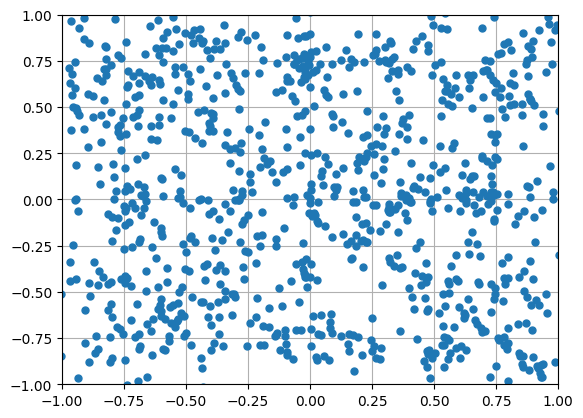

In [12]:
plt.plot(*ensemble.cordt, 'o', ms=5)
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)

After enough time, they should settle into position. We can see this if we choose a lot of grains of sand:

In [13]:
ensemble = Sand(10000, amplitude, delta=0.05)

This loop will move the sand 10 times, then plot

In [14]:
for i in range(1000):
    ensemble.move(n=1, m=3)

(-1.0, 1.0)

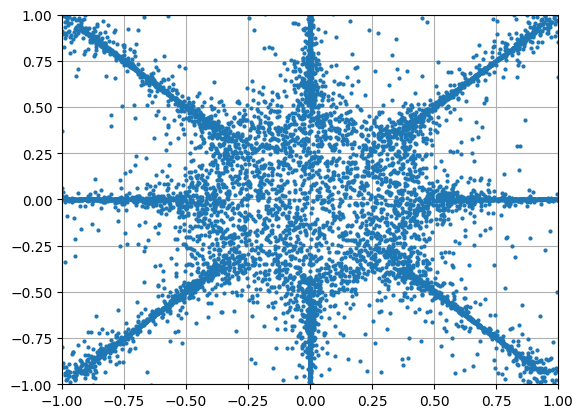

In [15]:
plt.plot(*ensemble.cordt, 'o', ms=2)
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)

Here we make an animation:
* Every 5 frames, we move all the points
* For the in between frames, we use linear interpolation to get the position as each grain of sand is going from its initial position to its moved position (this enables a smooth animation)

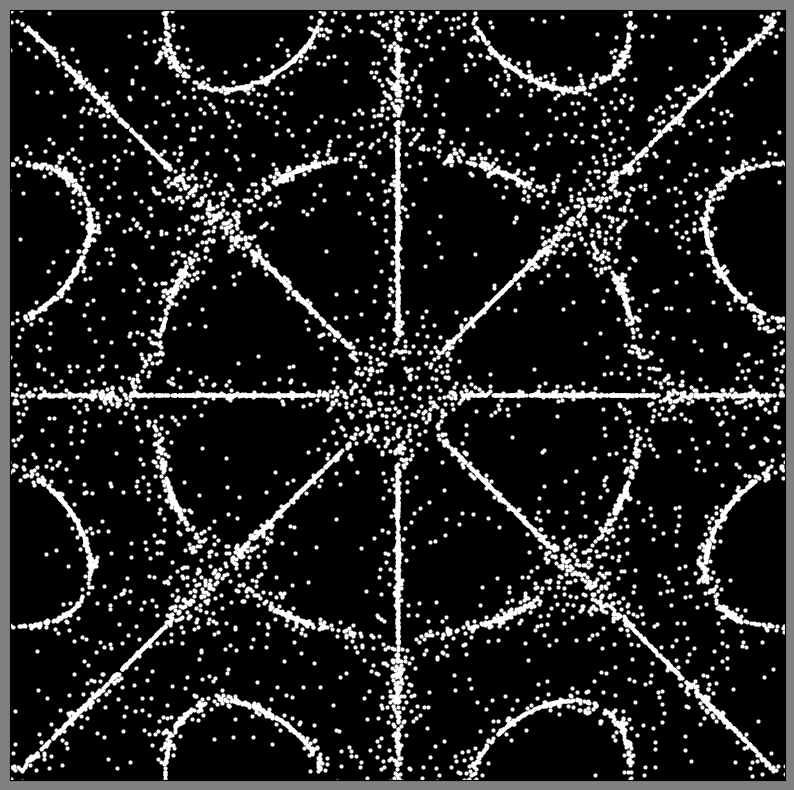

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ln1, = plt.plot([], [], 'o', ms=2, color='white')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
fig.patch.set_facecolor('grey')
ax.set_facecolor('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

def animate(i):
    if i%5==0:
        if i<=250:
            ensemble.move(n=9, m=5)
        elif i>250:
            ensemble.move(n=7, m=3)
    cordt = ensemble.prev_cordt + (i%5)/5 *(ensemble.cordt-ensemble.prev_cordt)
    ln1.set_data(*cordt)

ensemble = Sand(10000, amplitude, delta=0.075)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('Vibrating_Plate.gif',writer='pillow',fps=25,dpi=200)